In [2]:
import matplotlib.pyplot as plt
import scipy.misc as scpm
import pandas as pd
import glob
import numpy as np
import shelve

%matplotlib inline

In [3]:
movie_csv_path = "/Volumes/TSARSHAH 1/Datasets/Manas/Movie-Posters/movie_poster.csv"
posters_path = "/Volumes/TSARSHAH 1/Datasets/Manas/Movie-Posters/posters"

In [4]:
def shelf_open():
    shelf = shelve.open("/Volumes/TSARSHAH 1/Datasets/Manas/Movie-Posters/saved_img_dictionary")
    
    return shelf

In [5]:
data_ = pd.read_csv(movie_csv_path)
data_.head()

,tid,title,url,image_url,year,action,scifi,drama,romance
0,tt0120737,The Lord of the Rings: The Fellowship of the R...,http://www.imdb.com/title/tt0120737/,https://m.media-amazon.com/images/M/MV5BN2EyZj...,2001,True,False,False,False
1,tt0167260,The Lord of the Rings: The Return of the King,http://www.imdb.com/title/tt0167260/,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,2003,True,False,False,False
2,tt0167261,The Lord of the Rings: The Two Towers,http://www.imdb.com/title/tt0167261/,https://m.media-amazon.com/images/M/MV5BNGE5Mz...,2002,True,False,False,False
3,tt0169102,Lagaan: Once Upon a Time in India,http://www.imdb.com/title/tt0169102/,https://m.media-amazon.com/images/M/MV5BNDYxNW...,2001,False,False,True,False
4,tt0211915,Amélie,http://www.imdb.com/title/tt0211915/,https://m.media-amazon.com/images/M/MV5BNDg4Nj...,2001,False,False,False,True


In [6]:
data = data_.drop(['image_url', 'url', 'year'], axis = 1)

In [7]:
data.head()

,tid,title,action,scifi,drama,romance
0,tt0120737,The Lord of the Rings: The Fellowship of the R...,True,False,False,False
1,tt0167260,The Lord of the Rings: The Return of the King,True,False,False,False
2,tt0167261,The Lord of the Rings: The Two Towers,True,False,False,False
3,tt0169102,Lagaan: Once Upon a Time in India,False,False,True,False
4,tt0211915,Amélie,False,False,False,True


In [8]:
image_glob = glob.glob(posters_path + "/" + "*.jpg")
img_dict = {}
#print(image_glob)

In [9]:
def get_id(filename):
    
    index_s = filename.rfind("/t") + 3
    index_f = filename.rfind('.jpg')
    
    return filename[index_s:index_f]

In [10]:
def get_images_batches(startIndex, endIndex):
    
    image_dict = {}
    
    for i in range(startIndex, endIndex):
        
        _id = get_id(image_glob[i])
        #print(_id)
        
        if startIndex >= len(image_glob) or endIndex >= len(image_glob):
            print("Index out of range")
            return None
        
        try:
            image_dict[_id] = scpm.imread(image_glob[i])
            
        except:
            print("Unable to read images")
            pass
        
    
    
    return image_dict

In [11]:
def get_img_dict(batch = 1):
    
    shelf = shelf_open()
    
    j = 0
    
    for i in range(len(image_glob) // (batch - 1), len(image_glob) // batch, 25):
        
        dict_ = get_images_batches(i, i + 25)
        
        name = 'img' + str(j) + "_dict"
        print("Name is {}".format(name))
        
        j += 1
        
        shelf[name] = dict_
    
    print('DONE')
    
    shelf.close()

In [ ]:
#shelf.close()
get_img_dict(batch=2)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app


Name is img0_dict
Name is img1_dict
Name is img2_dict
Name is img3_dict
Name is img4_dict
Name is img5_dict
Name is img6_dict
Name is img7_dict
Name is img8_dict
Name is img9_dict
Name is img10_dict
Name is img11_dict
Name is img12_dict
Name is img13_dict
Name is img14_dict
Name is img15_dict
Name is img16_dict
Name is img17_dict
Name is img18_dict
Name is img19_dict
Name is img20_dict
Name is img21_dict
Name is img22_dict
Name is img23_dict
Name is img24_dict
Name is img25_dict
Name is img26_dict
Name is img27_dict
Name is img28_dict
Name is img29_dict
Name is img30_dict
Name is img31_dict
Name is img32_dict
Name is img33_dict
Name is img34_dict


In [1]:
shelf = shelf_open()
img0_dict = shelf['img0_dict']
shelf.close()

NameError: name 'shelf_open' is not defined

In [139]:
img0_dict

{'0035423': array([[[ 14,  16,  13],
         [ 14,  16,  13],
         [ 14,  16,  13],
         ...,
         [ 61,  42,  44],
         [115,  96,  98],
         [115,  96,  98]],
 
        [[ 13,  15,  12],
         [ 12,  14,  11],
         [ 12,  14,  11],
         ...,
         [ 50,  31,  33],
         [ 36,  17,  19],
         [ 36,  17,  19]],
 
        [[ 11,  13,  10],
         [ 11,  13,  10],
         [ 11,  13,  10],
         ...,
         [ 35,  19,  20],
         [ 40,  21,  23],
         [ 38,  22,  23]],
 
        ...,
 
        [[ 13,  13,  13],
         [ 13,  13,  13],
         [ 13,  13,  13],
         ...,
         [ 13,  14,  16],
         [ 12,  13,  15],
         [ 12,  13,  15]],
 
        [[ 13,  13,  13],
         [ 13,  13,  13],
         [ 13,  13,  13],
         ...,
         [ 13,  14,  16],
         [ 12,  13,  15],
         [ 12,  13,  15]],
 
        [[ 13,  13,  13],
         [ 13,  13,  13],
         [ 13,  13,  13],
         ...,
         [ 13,  1

In [69]:
for i in range(0, 20):
    poster = image_glob[i]
    #print(poster)
    try:
        _id = get_id(poster)
        print(_id)
        img_dict[_id] = scpm.imread(poster)
    except:
        pass

0240890
0361862
1656192
0272152


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


0449467
0486674
0420332
0437407
0337563
0439662
0468565
0473753
0035423
0995039
0843326
1748122
0472160
1440129
0817225
0824747


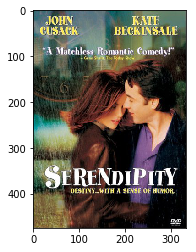

In [71]:
img_seren = img_dict['0240890']
#img_2 = img_dict['1683526']
plt.imshow(img_seren)

In [72]:
img_seren.shape

(475, 334, 3)

In [73]:
for _id, img in img_dict.items():
    print(img.shape)

(475, 334, 3)
(859, 580, 3)
(800, 540, 3)
(2200, 1566, 3)
(864, 576, 3)
(1481, 1000, 3)
(1158, 836, 3)
(750, 518, 3)
(640, 455, 3)
(400, 300, 3)
(1179, 795, 3)
(1145, 794, 3)
(963, 650, 3)
(2048, 1398, 3)
(720, 421, 3)
(2048, 1382, 3)
(1280, 881, 3)
(1425, 900, 3)
(3536, 2472, 3)
(1500, 1013, 3)
(2048, 1385, 3)
(1499, 1012, 3)
(450, 300, 3)
(1500, 1031, 4)
(2048, 1382, 4)
(2048, 1385, 3)
(2336, 3504, 3)
(2048, 1306, 3)
(1500, 948, 3)
(2048, 1382, 3)
(1800, 1216, 4)
(2048, 1386, 3)
(1467, 1000, 3)
(2048, 1382, 3)
(1188, 800, 3)
(2048, 1382, 3)
(3000, 2027, 3)
(1895, 1280, 3)
(2048, 1382, 3)
(2048, 1382, 3)
(2834, 1978, 3)
(2048, 1384, 3)
(2048, 1382, 3)
(3000, 2025, 3)
(2048, 1365, 3)
(5000, 3715, 3)
(2048, 1382, 3)
(2048, 1382, 3)
(3169, 2224, 3)
(755, 510, 3)
(2048, 1359, 3)
(2048, 1292, 3)
(720, 486, 3)
(475, 328, 3)
(2048, 1377, 3)
(2048, 1382, 3)
(2048, 1458, 3)
(1981, 1332, 3)
(2048, 1385, 3)
(4300, 3099, 3)
(2048, 1433, 3)
(2048, 1388, 3)
(2915, 2195, 3)
(1654, 1169, 3)
(475, 327

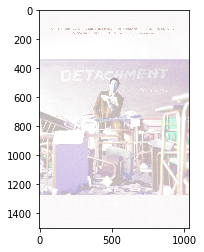

In [50]:
plt.imshow(img_2)

In [10]:
shelf['img_dict'] = img_dict

In [43]:
shelf.close()

In [81]:
shelf = shelve.open("/Volumes/TSARSHAH 1/Datasets/Manas/Movie-Posters/saved_img_dict")
img_dicct = shelf['img_dict']

In [16]:
shelf.close()

In [143]:
def display_poster(poster_id):
    
    row = data.loc[data['tid'] == "tt" + poster_id]
    #print(row)
    title = row['title'].values[0]
    
    genre = ""
    
    action = row['action'].values[0]
    scifi = row['scifi'].values[0]
    drama = row['drama'].values[0]
    rom = row['romance'].values[0]
    
    if action:
        genre += '|Action|'
    if rom:
        genre += '|Romance|'
    if drama:
        genre += '|Drama|'
    if scifi:
        genre += '|Sci-Fi|'
        
    
    plt.title("{} \n {}".format(title, genre))
    plt.imshow(img0_dict[poster_id])

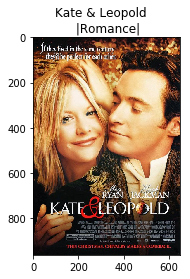

In [144]:
display_poster('0035423')


In [127]:
def image_resize(image, size=(700, 500)):
    
    image = scpm.imresize(image, size)
    image = image.astype(np.float32)
    image = (image / 127.5) - 1
    
    return image
    

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


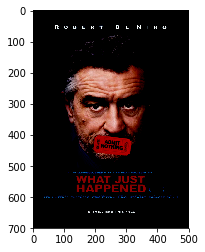

In [128]:
resized_img = image_resize(img_dict['0486674'])
plt.imshow(resized_img)